In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Carregar os dados
file_path = 'gym_members_exercise_tracking.csv'
df = pd.read_csv(file_path)


In [32]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [33]:
# Verificar valores nulos e linhas duplicadas
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

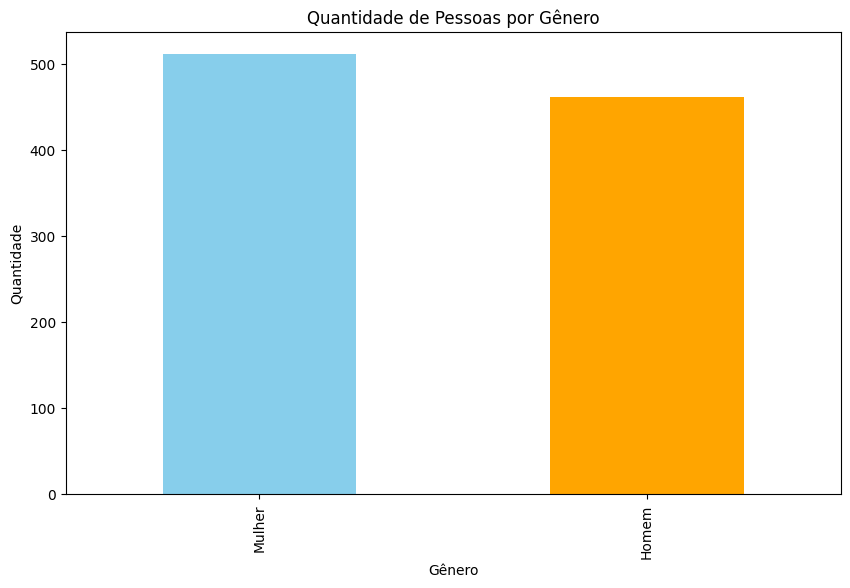

In [34]:
# Contar a quantidade de pessoas por gênero
gender_count = df['Gender'].value_counts()

# Plotar a quantidade de pessoas por gênero
plt.figure(figsize=(10, 6))
gender_count.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Quantidade de Pessoas por Gênero')
plt.ylabel('Quantidade')
plt.xlabel('Gênero')
plt.xticks(ticks=[0, 1], labels=['Mulher', 'Homem'])
plt.show()

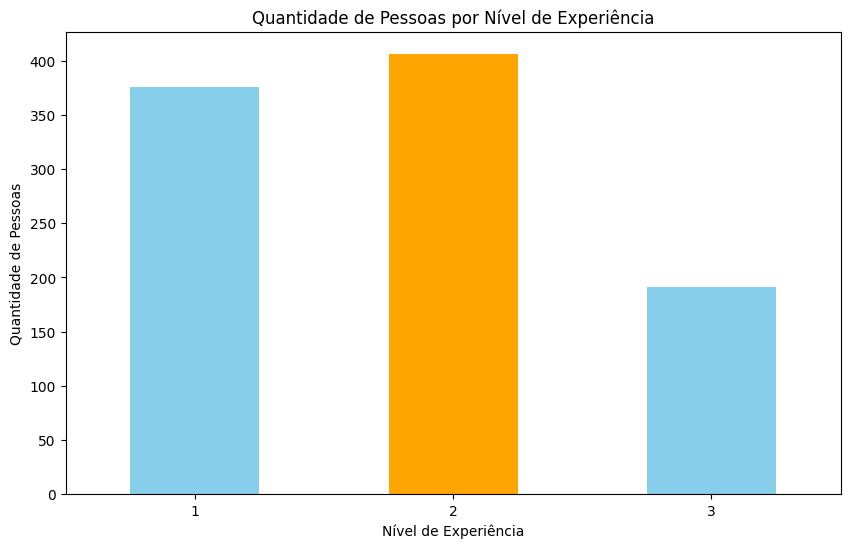

In [35]:
# Contar a quantidade de pessoas por nível de experiência
experience_counts = df['Experience_Level'].value_counts().sort_index()

# Plotar a quantidade de pessoas por nível de experiência
plt.figure(figsize=(10, 6))
experience_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Quantidade de Pessoas por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Quantidade de Pessoas')
plt.xticks(rotation=0)
plt.show()

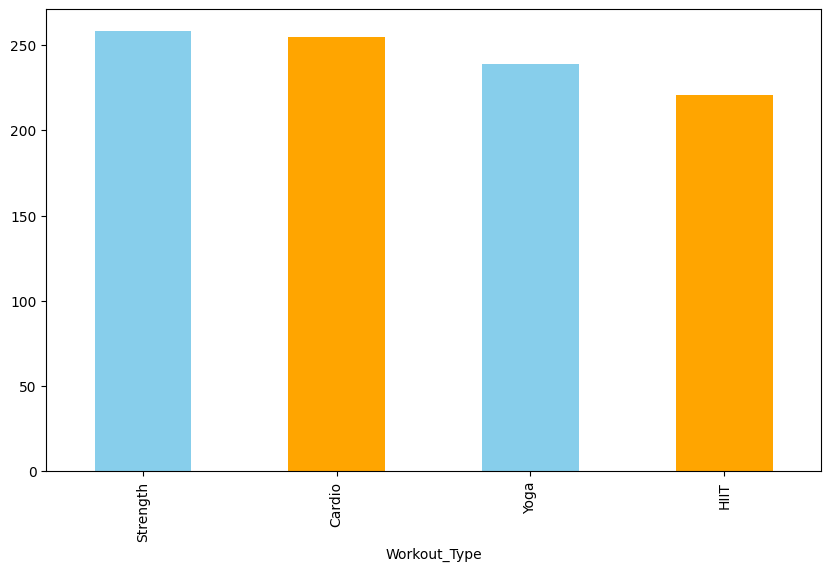

In [36]:
# Contar a quantidade de pessoas por tipo de atividade
Workout_Type = df['Workout_Type'].value_counts()

# Plotar a quantidade de pessoas por tipo de atividade
plt.figure(figsize=(10, 6))
Workout_Type.plot(kind='bar', color=['skyblue', 'orange'])
plt.show()

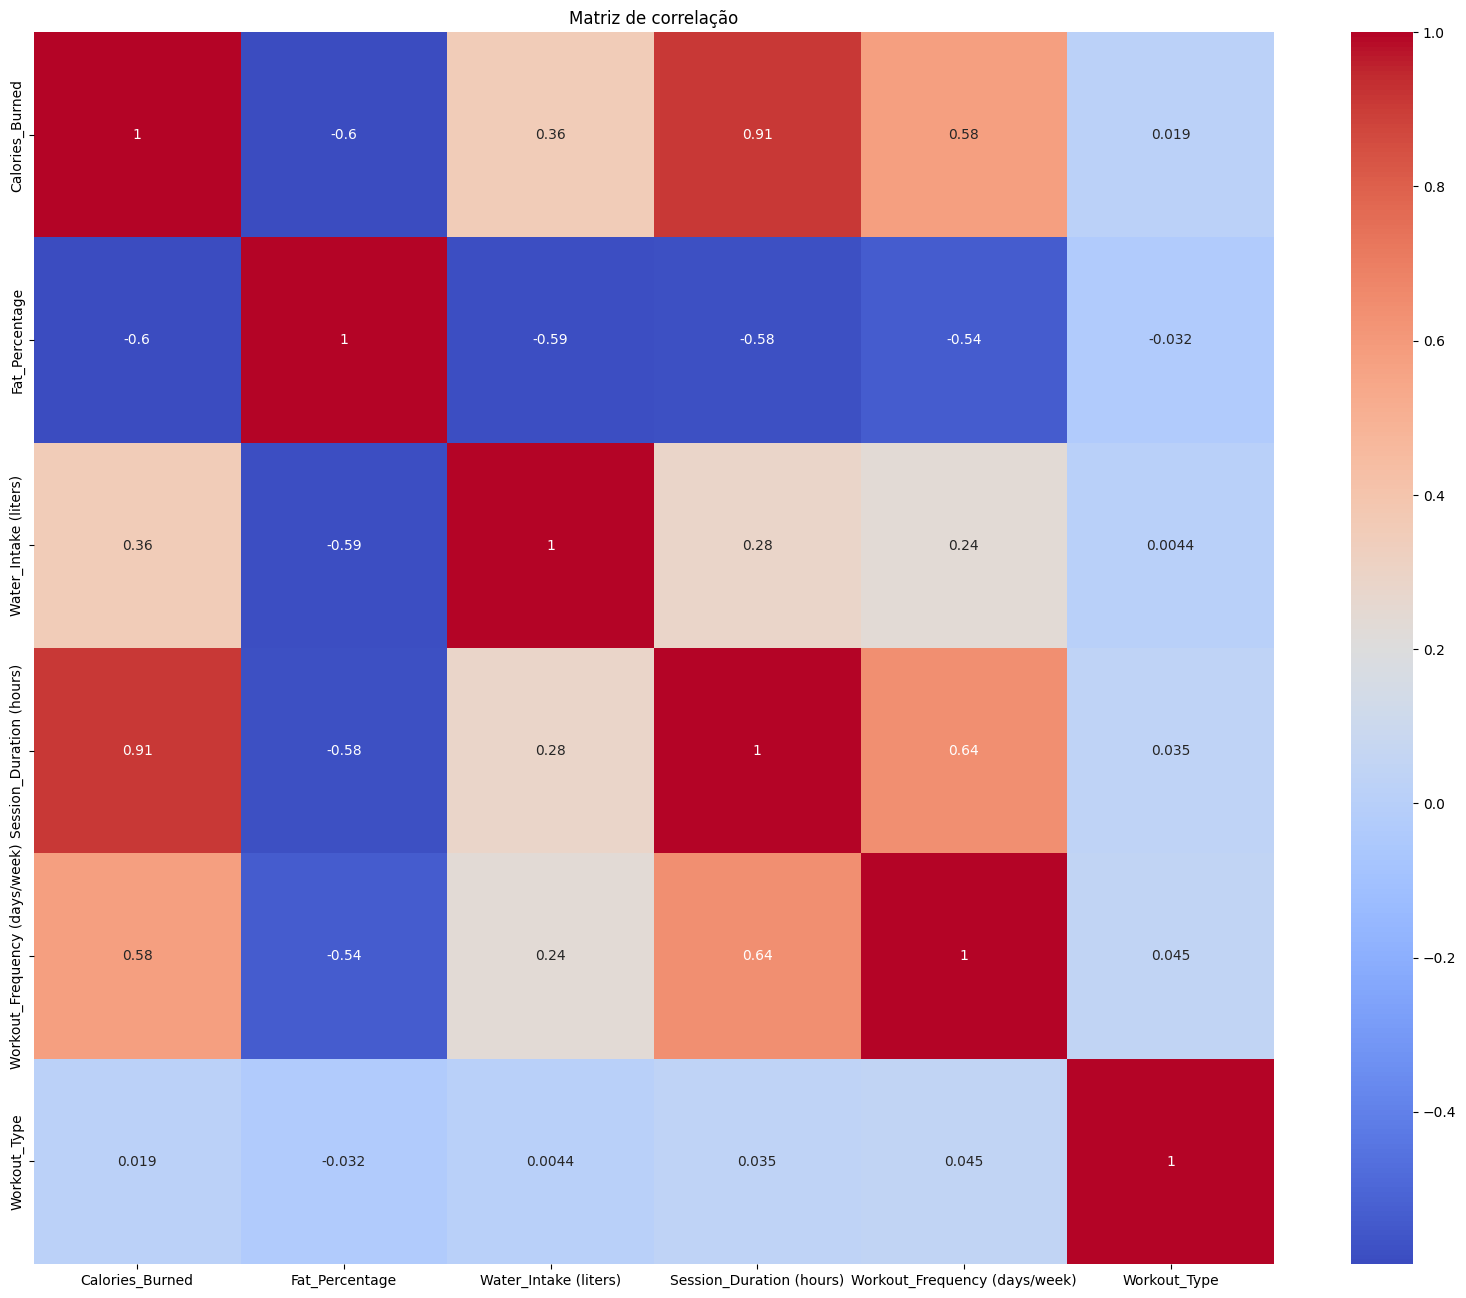

Impacto por Tipo de Exercício (média de calorias queimadas e perda de gordura):
              Calories_Burned  Fat_Percentage
Workout_Type                                 
Cardio             884.513725       25.397647
HIIT               925.805430       24.461086
Strength           910.697674       25.459302
Yoga               903.188285       24.483682


In [41]:
# Selecionar as colunas relevantes para análise de correlação
columns_of_interest = ['Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 
                       'Session_Duration (hours)', 'Workout_Frequency (days/week)', 'Workout_Type']

# Mapeando os tipos de exercício em números para facilitar a correlação
df['Workout_Type'] = df['Workout_Type'].astype('category').cat.codes

# Selecionando os dados filtrados
correlation_data = df[columns_of_interest]

# Calculando a correlação
correlation_matrix = correlation_data.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlação')
plt.show()

# Dicionário para mapear os tipos de exercícios com seus nomes
workout_type_map = {0: 'Cardio', 1: 'HIIT', 2: 'Strength', 3: 'Yoga'}

# Calculando o impacto por tipo de exercício em relação às calorias queimadas e perda de gordura
impact_by_workout_type = df.groupby('Workout_Type')[['Calories_Burned', 'Fat_Percentage']].mean()

# Substituir os valores numéricos pelos nomes correspondentes
impact_by_workout_type.index = impact_by_workout_type.index.map(workout_type_map)

# Exibindo os resultados com os nomes dos tipos de exercício
print("Impacto por Tipo de Exercício (média de calorias queimadas e perda de gordura):")
print(impact_by_workout_type)

In [38]:
# Limpar e preparar os dados
data_cleaned = df.copy()

# Convertendo variáveis categóricas em numéricas
data_cleaned['Gender'] = data_cleaned['Gender'].map({'Male': 1, 'Female': 0})
data_cleaned['Workout_Type'] = data_cleaned['Workout_Type'].astype('category').cat.codes

# Selecionando as features e o target
X = data_cleaned[['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
                  'Session_Duration (hours)', 'Workout_Type', 'Experience_Level']]
y = data_cleaned['Calories_Burned']

In [42]:
data_cleaned['FCR'] = data_cleaned['Max_BPM'] - data_cleaned['Resting_BPM']

# Definindo uma condição de risco para FCR
# Considerando FCR abaixo de 60 ou acima de 100 como potencial risco
data_cleaned['Cardiac_Risk'] = data_cleaned['FCR'].apply(lambda x: 'Risco' if x < 60 or x > 100 else 'Normal')

# Exibindo os membros que podem estar em risco
cardiac_risk_data = data_cleaned[['Age', 'Max_BPM', 'Resting_BPM', 'FCR', 'Cardiac_Risk']]
print("Membros com Potencial Risco Cardíaco:")
print(cardiac_risk_data[cardiac_risk_data['Cardiac_Risk'] == 'Risco'])

# 2. Avaliação do Índice de Massa Corporal (IMC)
# Calcular o IMC (já foi calculado anteriormente, mas por completude)
data_cleaned['BMI'] = data_cleaned['Weight (kg)'] / (data_cleaned['Height (m)'] ** 2)

# Classificando os membros de acordo com o IMC
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Abaixo do Peso'
    elif 18.5 <= bmi < 24.9:
        return 'Peso Normal'
    elif 25 <= bmi < 29.9:
        return 'Sobrepeso'
    else:
        return 'Obesidade'

data_cleaned['BMI_Category'] = data_cleaned['BMI'].apply(classify_bmi)

# Exibindo membros que estão fora do peso normal
bmi_risk_data = data_cleaned[['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'BMI_Category']]
print("\nMembros com IMC fora da faixa saudável:")
print(bmi_risk_data[bmi_risk_data['BMI_Category'] != 'Peso Normal'])

Membros com Potencial Risco Cardíaco:
     Age  Max_BPM  Resting_BPM  FCR Cardiac_Risk
0     56      180           60  120        Risco
1     46      179           66  113        Risco
2     32      167           54  113        Risco
3     25      190           56  134        Risco
4     38      188           68  120        Risco
..   ...      ...          ...  ...          ...
967   20      172           67  105        Risco
968   24      187           67  120        Risco
969   25      184           56  128        Risco
970   59      194           53  141        Risco
971   32      198           62  136        Risco

[857 rows x 5 columns]

Membros com IMC fora da faixa saudável:
     Age  Weight (kg)  Height (m)        BMI    BMI_Category
0     56         88.3        1.71  30.197326       Obesidade
1     46         74.9        1.53  31.996241       Obesidade
3     25         53.2        1.70  18.408304  Abaixo do Peso
4     38         46.1        1.79  14.387816  Abaixo do Peso
7   

C:\Users\Alan de Castro\AppData\Local\Temp\ipykernel_177396\2651722097.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cardiac_Risk', data=cardiac_risk_data, palette="coolwarm")


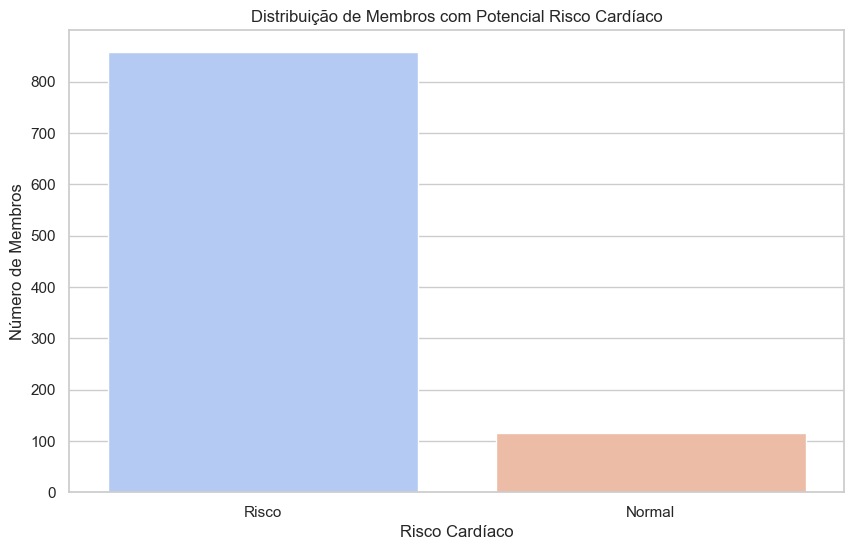

In [44]:
# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# 1. Gráfico de membros com risco cardíaco
plt.figure(figsize=(10, 6))
sns.countplot(x='Cardiac_Risk', data=cardiac_risk_data, palette="coolwarm")
plt.title('Distribuição de Membros com Potencial Risco Cardíaco')
plt.xlabel('Risco Cardíaco')
plt.ylabel('Número de Membros')
plt.show()


C:\Users\Alan de Castro\AppData\Local\Temp\ipykernel_177396\3045909283.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BMI_Category', data=bmi_risk_data, palette="viridis")


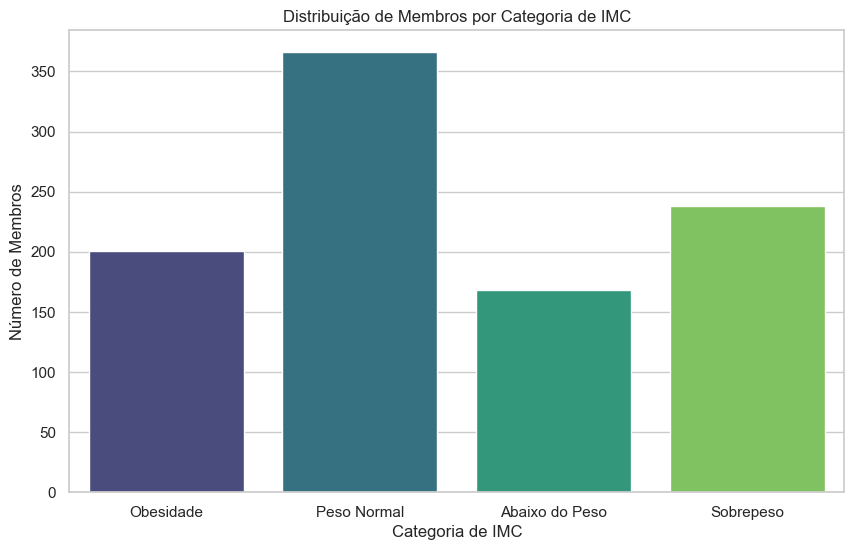

In [45]:
# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# 2. Gráfico de distribuição de IMC dos membros
plt.figure(figsize=(10, 6))
sns.countplot(x='BMI_Category', data=bmi_risk_data, palette="viridis")
plt.title('Distribuição de Membros por Categoria de IMC')
plt.xlabel('Categoria de IMC')
plt.ylabel('Número de Membros')
plt.show()

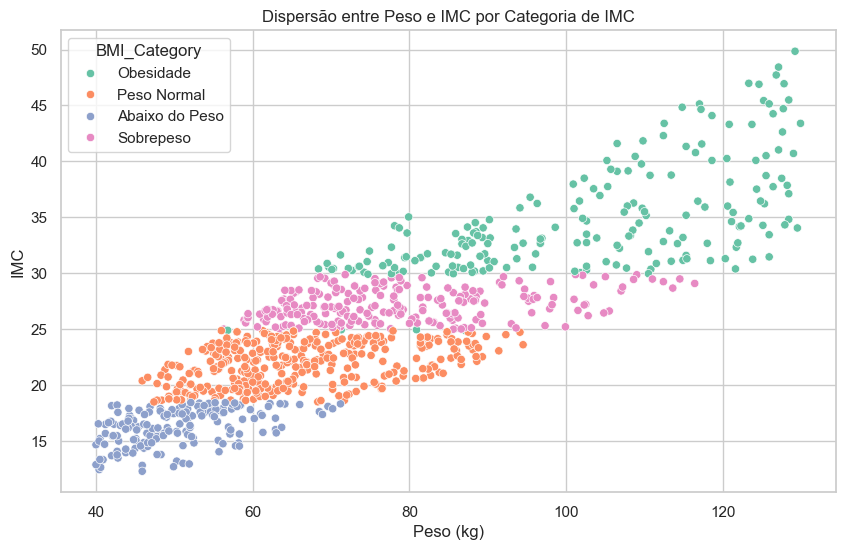

In [46]:
# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# 3. Gráfico de dispersão entre Peso e IMC
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight (kg)', y='BMI', hue='BMI_Category', data=bmi_risk_data, palette="Set2")
plt.title('Dispersão entre Peso e IMC por Categoria de IMC')
plt.xlabel('Peso (kg)')
plt.ylabel('IMC')
plt.show()

In [39]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
mae = mean_absolute_error(y_test, y_pred)

# Exibindo os resultados
print(f"Erro Médio Absoluto (MAE): {mae}")
print("Previsões (Primeiros 5 exemplos):")
for i in range(5):
    print(f"Previsão: {y_pred[i]:.2f}, Valor Real: {y_test.values[i]:.2f}")


Erro Médio Absoluto (MAE): 33.858051282051285
Previsões (Primeiros 5 exemplos):
Previsão: 913.41, Valor Real: 929.00
Previsão: 1447.38, Valor Real: 1401.00
Previsão: 898.53, Valor Real: 925.00
Previsão: 1091.66, Valor Real: 1155.00
Previsão: 1424.58, Valor Real: 1587.00
